In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import gc

from sklearn.model_selection import TimeSeriesSplit

pd.set_option('display.expand_frame_repr', False)

In [2]:
os.chdir("C:/Users/lubor.pacak/Desktop/kaggle_ashrae")  #prace

In [33]:
%run functions_file.py

In [4]:
building=pd.read_csv("building_metadata.csv")
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")
weather_test=pd.read_csv("weather_test.csv")
weather_train=pd.read_csv("weather_train.csv")

In [5]:
weather=pd.concat([weather_train,weather_test])

In [6]:
train=pd.merge(train,building,how='left',left_on='building_id',right_on='building_id')
test=pd.merge(test,building,how='left',left_on='building_id',right_on='building_id')

In [7]:
train=pd.merge(train,weather_train,how='left',left_on=['site_id','timestamp'],right_on=['site_id','timestamp'])
test=pd.merge(test,weather_test,how='left',left_on=['site_id','timestamp'],right_on=['site_id','timestamp'])

In [8]:
del building, weather_test, weather_train
gc.collect()

185

In [11]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


### Target exploration

electricity


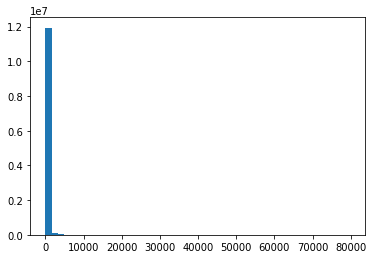

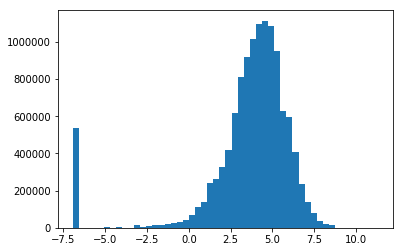

0.5965992451560884
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
hotwater


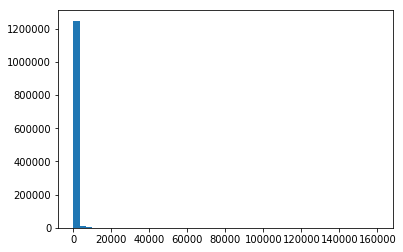

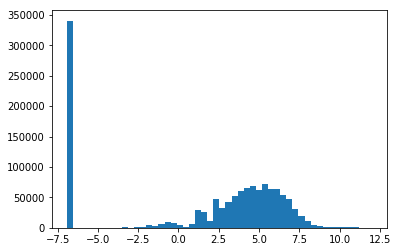

0.062526253827395
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
chilledwater


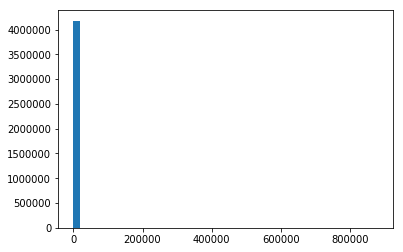

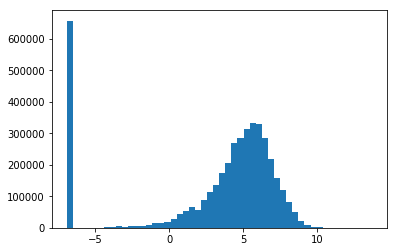

0.2068865903908271
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
steam


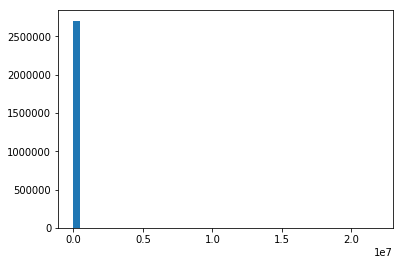

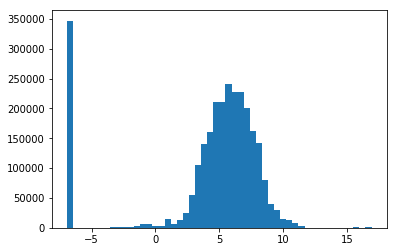

0.13398791062568943
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [12]:
for i in train['meter'].unique():
    if (i==0):
        print('electricity')
    if (i==1):
        print('chilledwater')
    if (i==2):
        print('steam')
    if (i==3):
        print('hotwater')
    plt.hist(train[train['meter']==i]['meter_reading'],50)
    plt.show()
    plt.hist(np.log(train[train['meter']==i]['meter_reading']+0.001),50)
    plt.show()
    print(train[train['meter']==i].shape[0]/train.shape[0])
    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')

In [9]:
train['month']=pd.to_datetime(train['timestamp']).dt.month
train['day']=pd.to_datetime(train['timestamp']).dt.day
train['weekday']=pd.to_datetime(train['timestamp']).dt.dayofweek
train['hour']=pd.to_datetime(train['timestamp']).dt.hour

test['month']=pd.to_datetime(test['timestamp']).dt.month
test['day']=pd.to_datetime(test['timestamp']).dt.day
test['weekday']=pd.to_datetime(test['timestamp']).dt.dayofweek
test['hour']=pd.to_datetime(test['timestamp']).dt.hour

In [10]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,day,weekday,hour
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,1,4,0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,1,4,0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,1,4,0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,1,4,0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,1,4,0


meter is
electricity


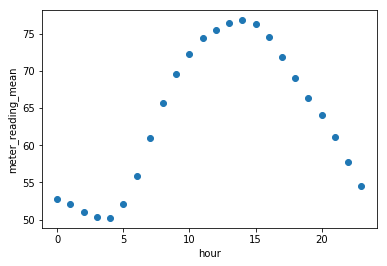

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
meter is
hotwater


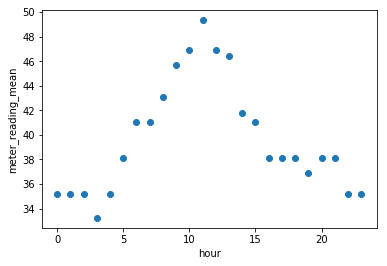

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
meter is
chilledwater


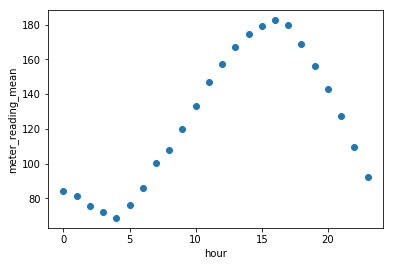

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
meter is
steam


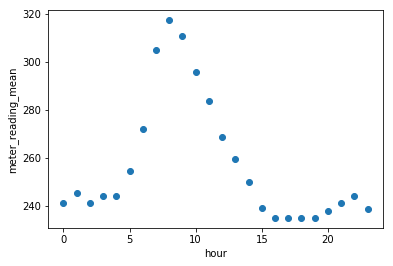

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [16]:
for j in train['meter'].unique():
    subset=train[((train['meter']==j))]
        
    print('meter is')
    if (j==0):
        print('electricity')
    if (j==1):
        print('chilledwater')
    if (j==2):
        print('steam')
    if (j==3):
        print('hotwater')
            
        
    subset = subset.groupby(['hour']).aggregate({'meter_reading':['median']})
    subset.columns=['_'.join (col) for col in list(subset)]
    subset.reset_index(inplace=True)
        
    plt.scatter('hour', 'meter_reading_median', data=subset)
    plt.xlabel('hour')
    plt.ylabel('meter_reading_mean')
    plt.show()
        
    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')

In [11]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,day,weekday,hour
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,1,4,0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,1,4,0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,1,4,0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,1,4,0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,1,1,4,0


## Adding features from history

In [9]:
train,test=compute_history('air_temperature',1,train,test,weather)
gc.collect()

KeyError: 'timestamp'

In [23]:
grouped_weather=weather.groupby('site_id')

In [24]:
name_of_feature_laged='air_temperature'+'_'+str(1)

In [28]:
weather[name_of_feature_laged]=grouped_weather['air_temperature'].rolling(1,min_periods=0).mean().reset_index(drop=True)

In [32]:
weather.head(300)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,air_temperature_1
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,25.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5,24.4
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,22.8
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,21.1
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,20.0
5,0,2016-01-01 05:00:00,19.4,NaN,19.4,0.0,NaN,0.0,0.0,19.4
6,0,2016-01-01 06:00:00,21.1,6.0,21.1,-1.0,1019.4,0.0,0.0,21.1
7,0,2016-01-01 07:00:00,21.1,NaN,21.1,0.0,1018.8,210.0,1.5,21.1
8,0,2016-01-01 08:00:00,20.6,NaN,20.0,0.0,1018.1,0.0,0.0,20.6
9,0,2016-01-01 09:00:00,21.1,NaN,20.6,0.0,1019.0,290.0,1.5,21.1


In [26]:
train.head(150)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,air_temperature_24_x,air_temperature_24_y,air_temperature_24
0,0,0,2016-01-01 00:00:00,0.0000,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,25.0,25.0,NaN
1,1,0,2016-01-01 00:00:00,0.0000,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,25.0,25.0,NaN
2,2,0,2016-01-01 00:00:00,0.0000,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,25.0,25.0,NaN
3,3,0,2016-01-01 00:00:00,0.0000,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,25.0,25.0,NaN
4,4,0,2016-01-01 00:00:00,0.0000,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,25.0,25.0,NaN
5,5,0,2016-01-01 00:00:00,0.0000,0,Education,8000,2000.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,25.0,25.0,NaN
6,6,0,2016-01-01 00:00:00,0.0000,0,Lodging/residential,27926,1981.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,25.0,25.0,NaN
7,7,0,2016-01-01 00:00:00,0.0000,0,Education,121074,1989.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,25.0,25.0,NaN
8,8,0,2016-01-01 00:00:00,0.0000,0,Education,60809,2003.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,25.0,25.0,NaN
9,9,0,2016-01-01 00:00:00,0.0000,0,Office,27000,2010.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,25.0,25.0,NaN


In [34]:
weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,air_temperature_1
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,25.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5,24.4
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,22.8
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,21.1
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,20.0


In [37]:
weather=compute_history('air_temperature',1,weather)
gc.collect()

7

In [38]:
weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,air_temperature_1,air_temperature_24
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,25.0,25.000000
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5,24.4,24.700000
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,22.8,24.066667
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,21.1,23.325000
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,20.0,22.660000


In [17]:
num_preds,cat_preds=detect_types(train)

In [20]:
num_preds.remove('building_id')
num_preds.remove('meter_reading')
num_preds.remove('meter')
num_preds.remove('site_id')
num_preds.remove('month')
num_preds.remove('day')
num_preds.remove('weekday')
num_preds.remove('hour')

cat_preds.remove('timestamp')
cat_preds.append('meter')
cat_preds.append('building_id')
cat_preds.append('site_id')
cat_preds.append('month')
cat_preds.append('day')
cat_preds.append('weekday')
cat_preds.append('hour')

In [21]:
for i in cat_preds:
    train[i]=train[i].astype('category')
    test[i]=test[i].astype('category')

## Exploration of categorical variables

primary_use


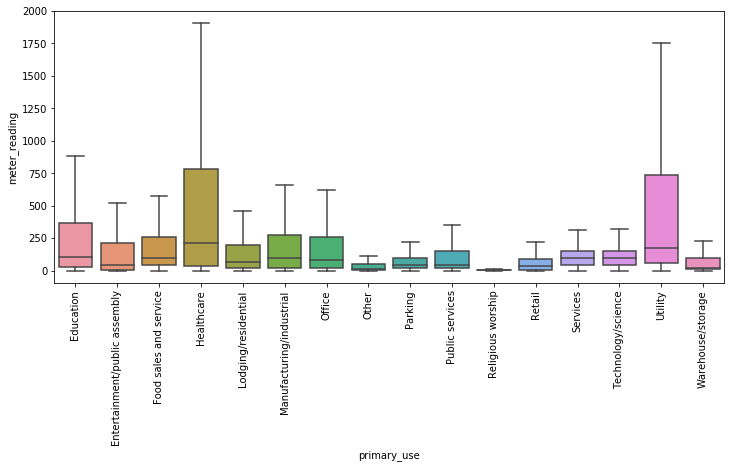

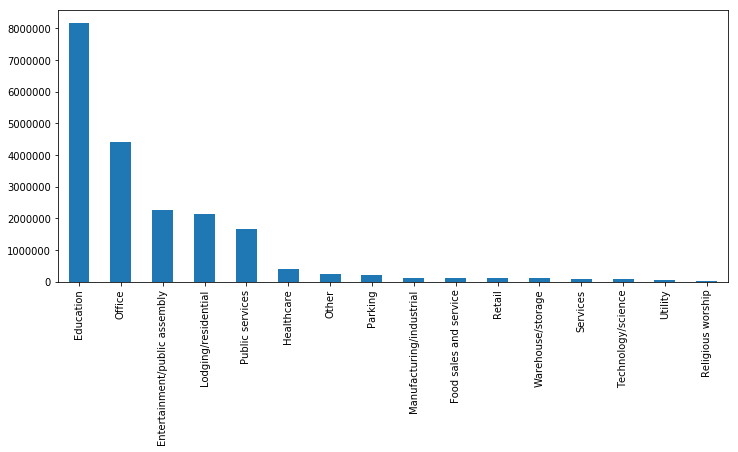

---------------------------------------------------------------------------------------------
meter


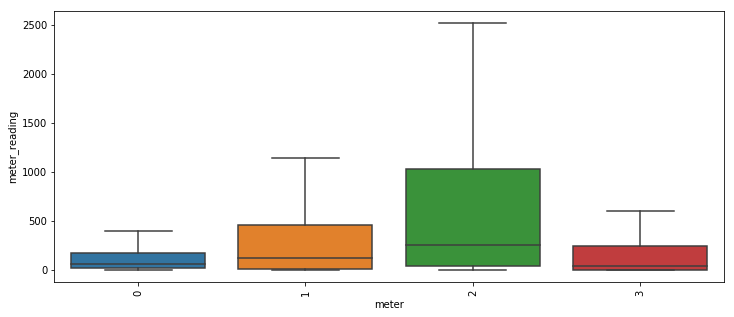

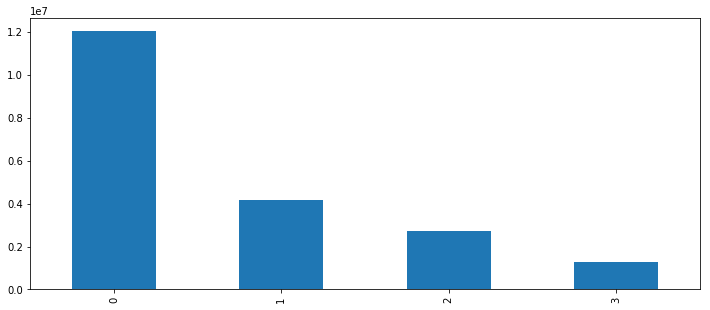

---------------------------------------------------------------------------------------------
building_id


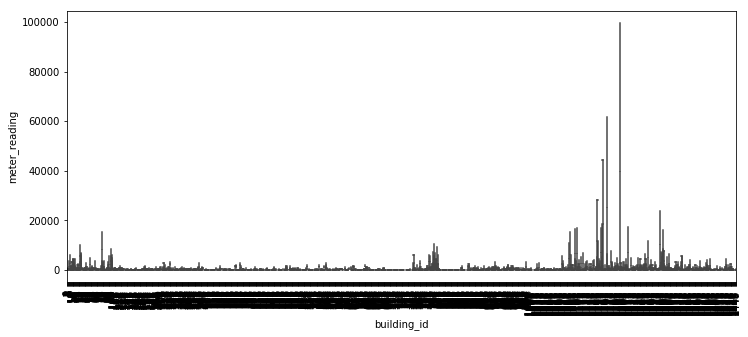

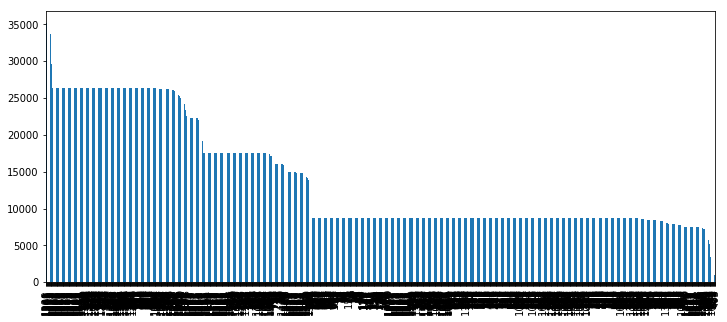

---------------------------------------------------------------------------------------------
site_id


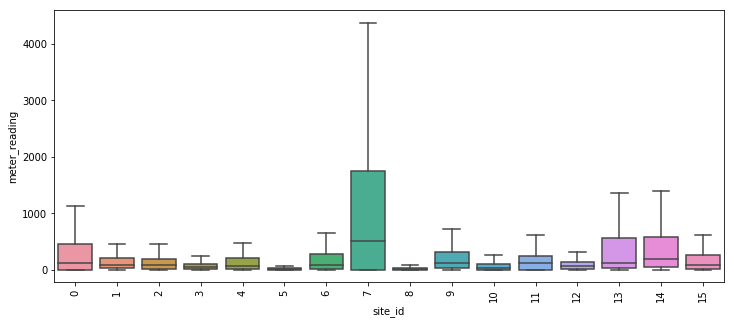

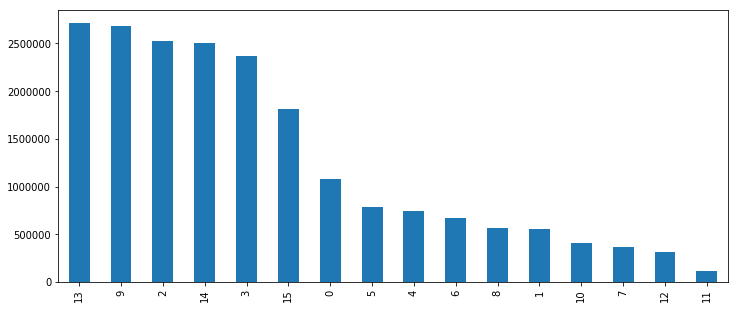

---------------------------------------------------------------------------------------------
month


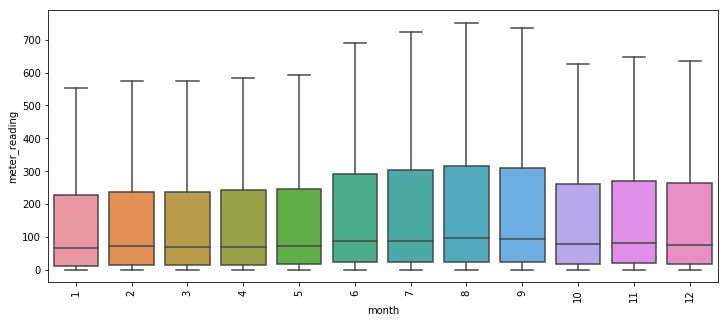

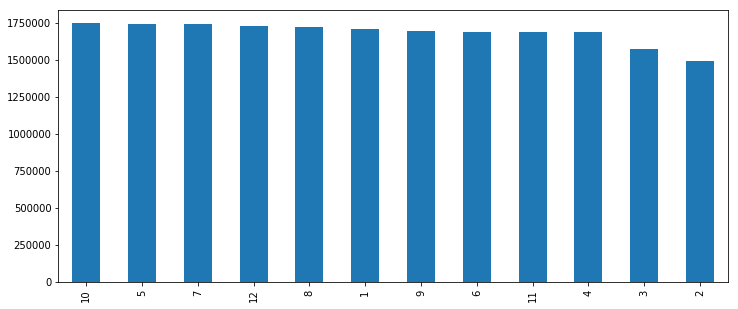

---------------------------------------------------------------------------------------------
day


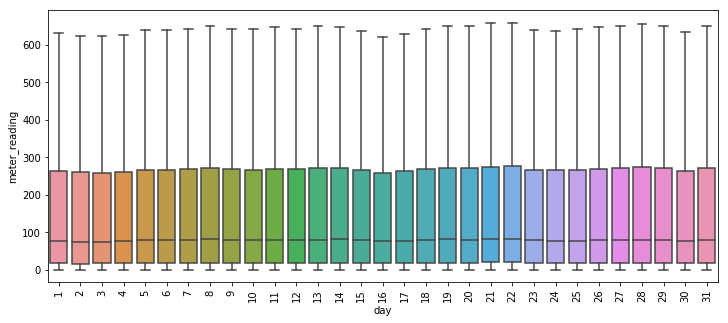

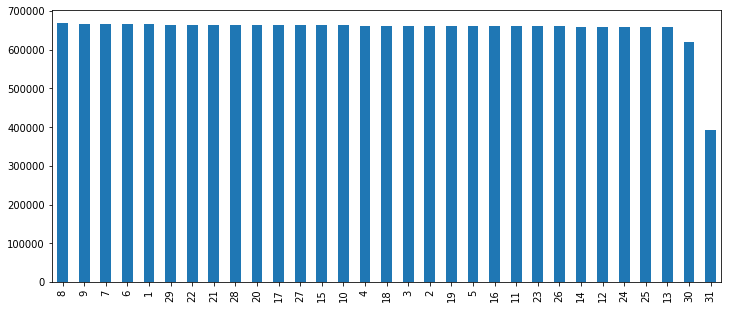

---------------------------------------------------------------------------------------------
weekday


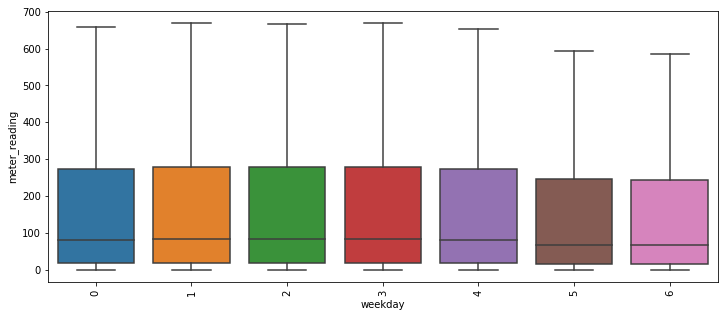

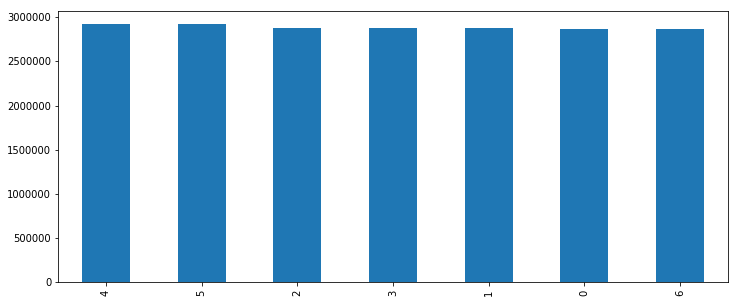

---------------------------------------------------------------------------------------------
hour


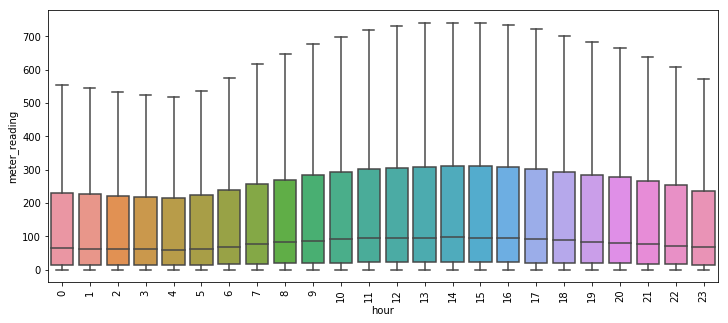

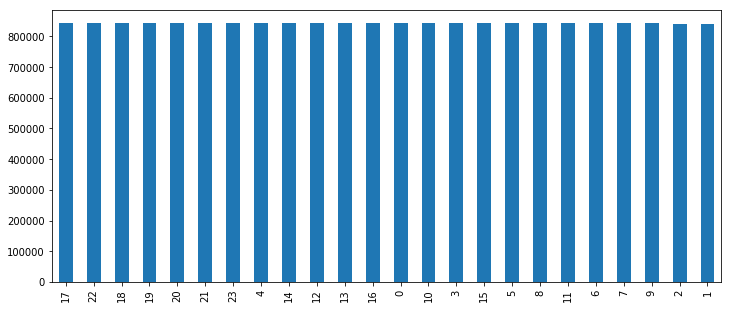

---------------------------------------------------------------------------------------------


In [23]:
for i in cat_preds:
    print(i)
    graph_exploration_continuous(train[i],train['meter_reading'])
    
    plt.figure(figsize=(12,5))
    train[i].value_counts(dropna=False).plot(kind='bar')
    plt.show()
    print('---------------------------------------------------------------------------------------------')

square_feet
SAME FREQUENCY BINNING:


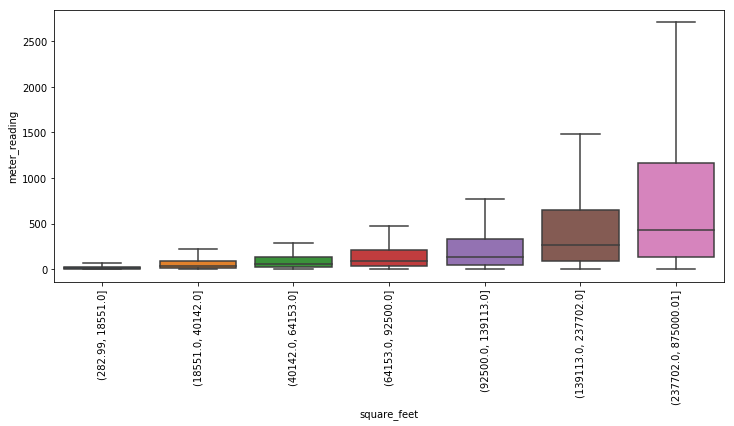

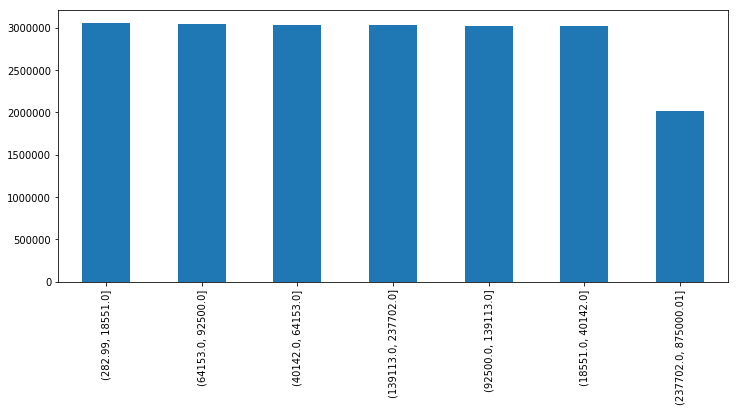

SAME DISTANCE BINNING:


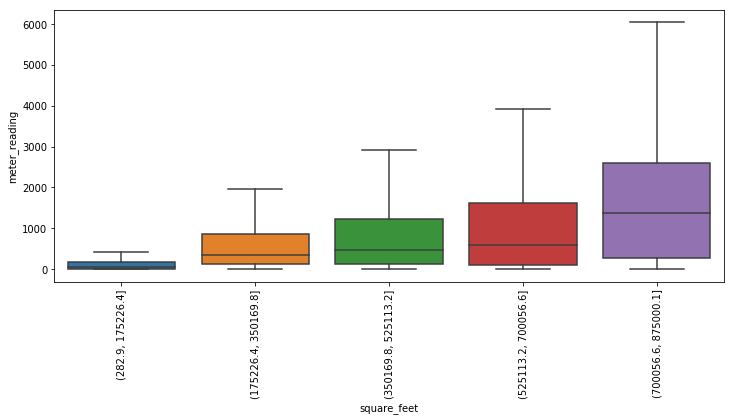

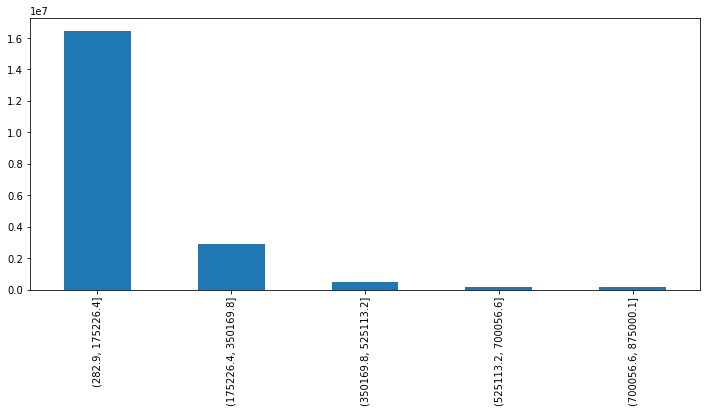

---------------------------------------------------------
---------------------------------------------------------
year_built
SAME FREQUENCY BINNING:


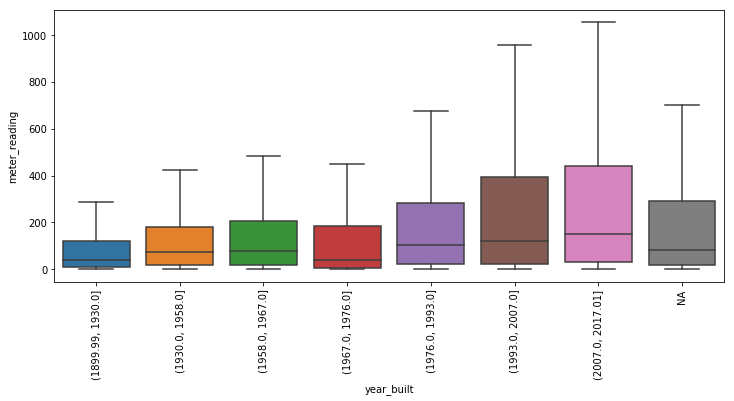

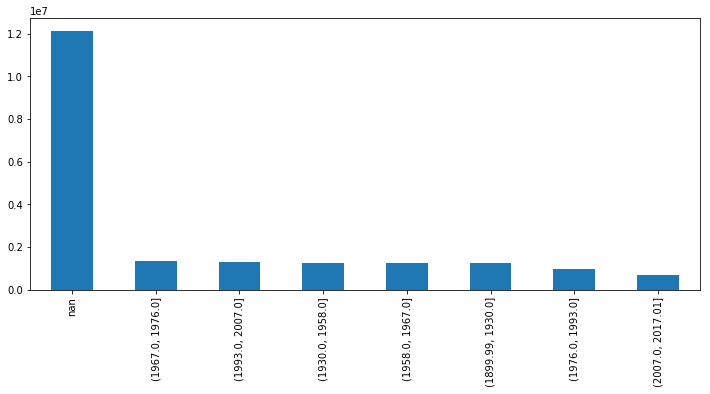

SAME DISTANCE BINNING:


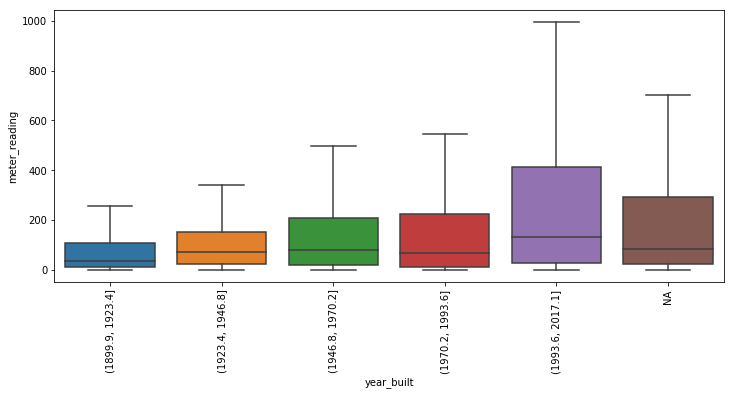

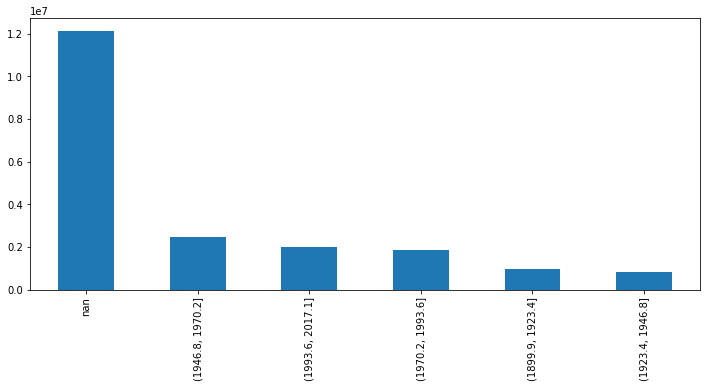

---------------------------------------------------------
---------------------------------------------------------
floor_count
SAME FREQUENCY BINNING:


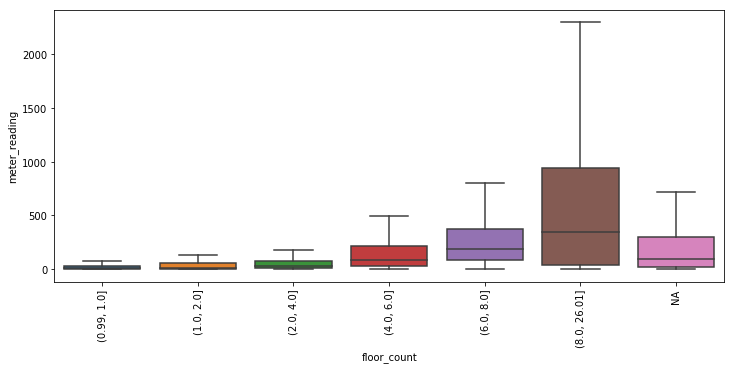

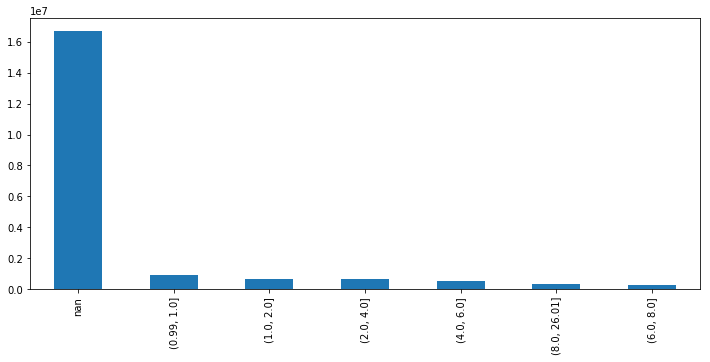

SAME DISTANCE BINNING:


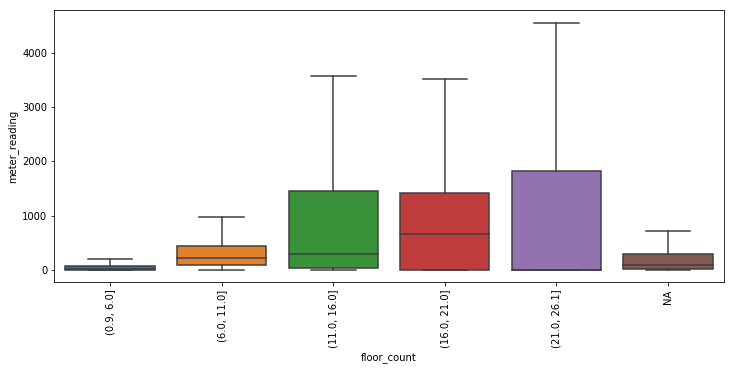

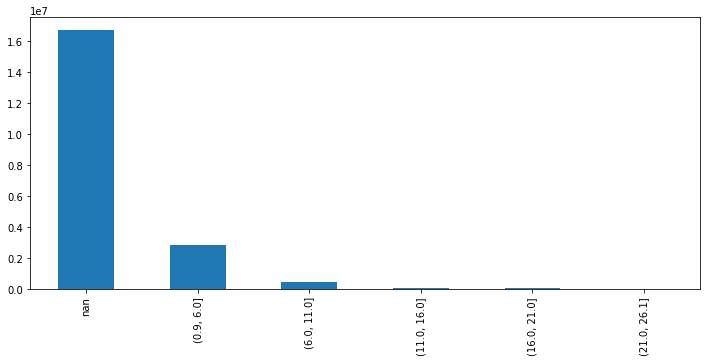

---------------------------------------------------------
---------------------------------------------------------
air_temperature
SAME FREQUENCY BINNING:


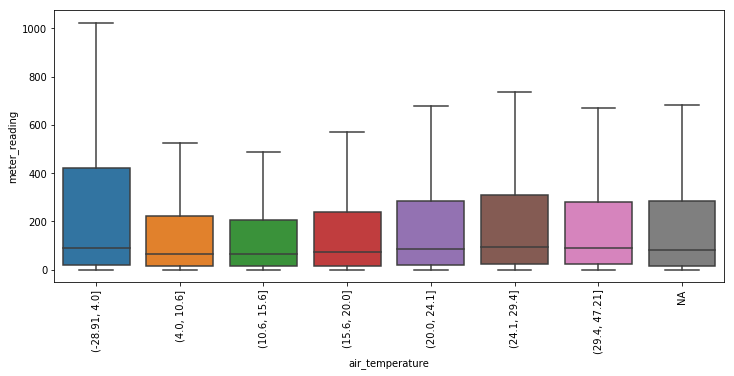

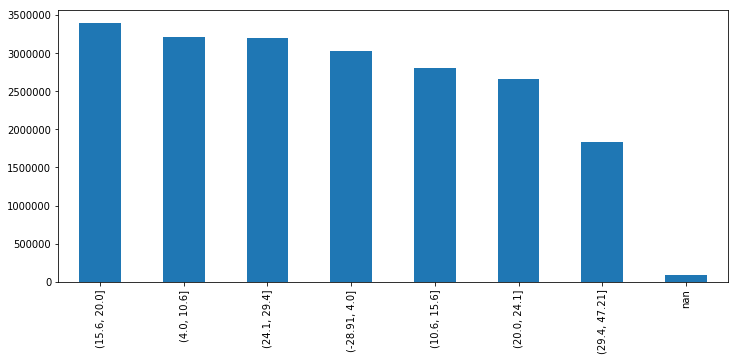

SAME DISTANCE BINNING:


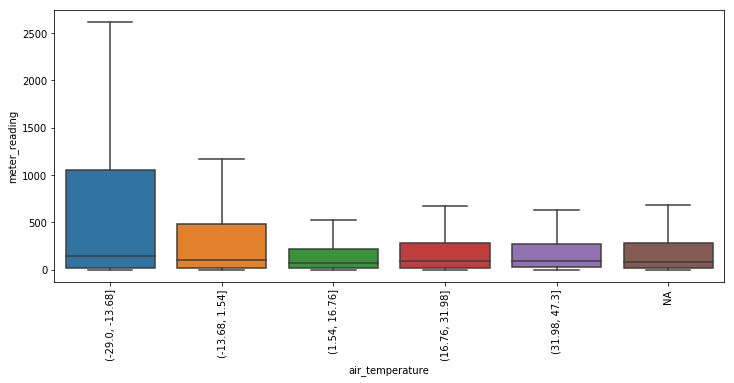

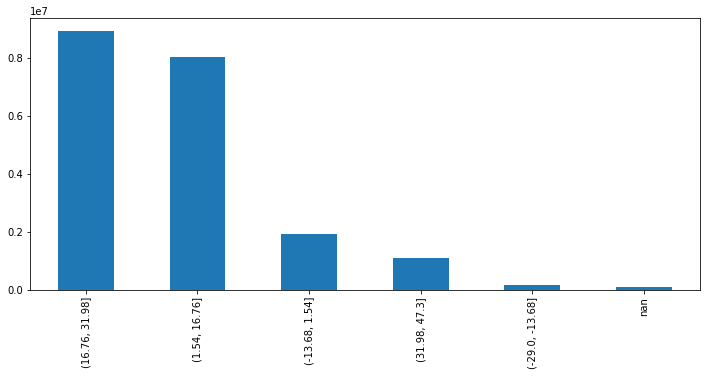

---------------------------------------------------------
---------------------------------------------------------
cloud_coverage
SAME FREQUENCY BINNING:


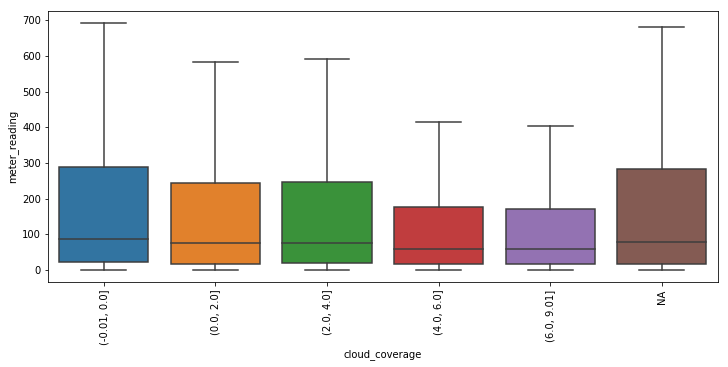

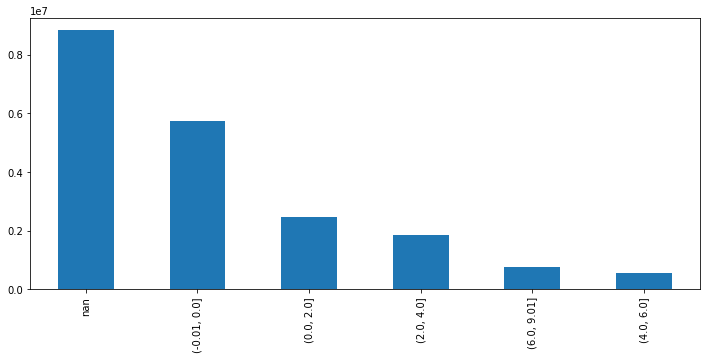

SAME DISTANCE BINNING:


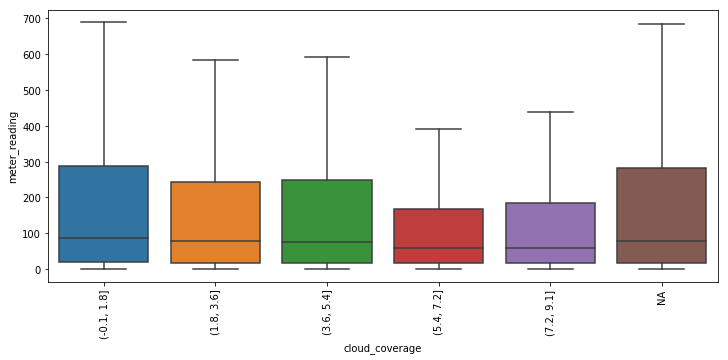

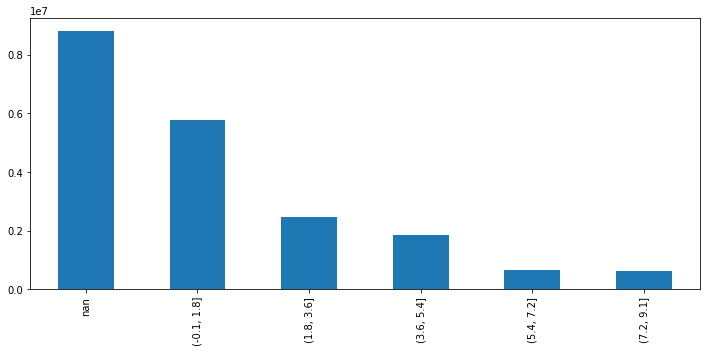

---------------------------------------------------------
---------------------------------------------------------
dew_temperature
SAME FREQUENCY BINNING:


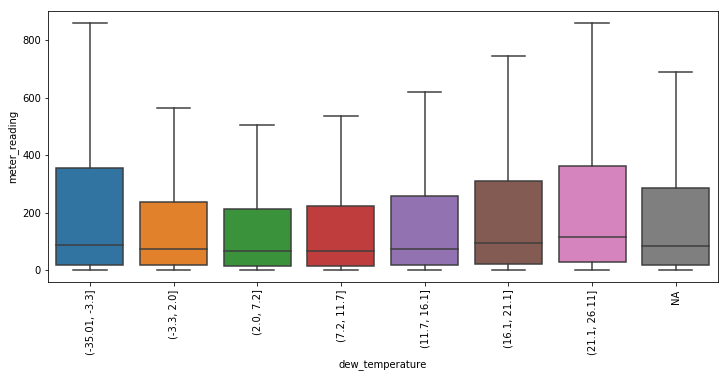

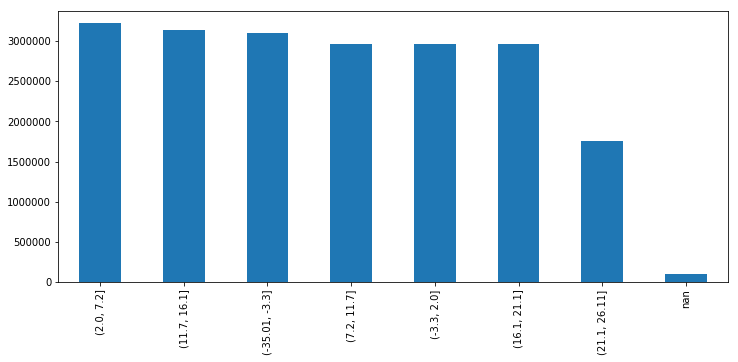

SAME DISTANCE BINNING:


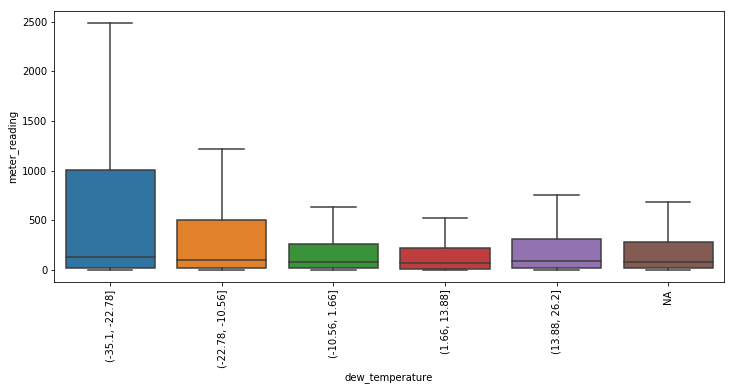

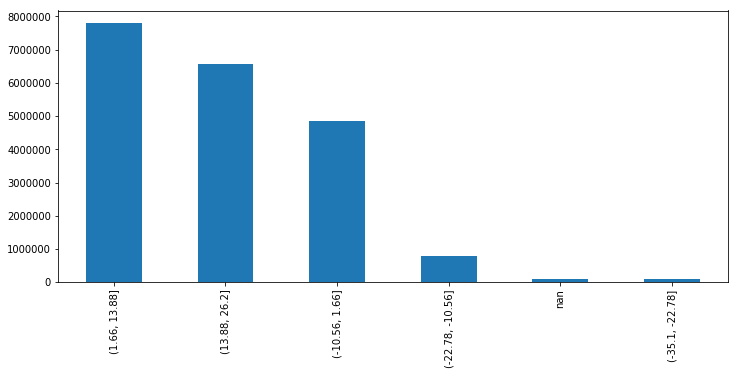

---------------------------------------------------------
---------------------------------------------------------
precip_depth_1_hr
SAME FREQUENCY BINNING:


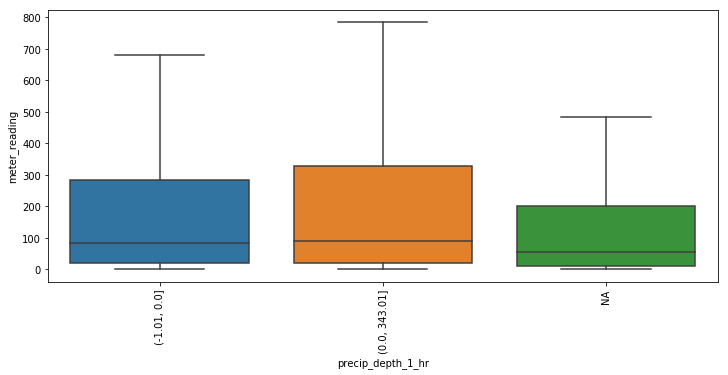

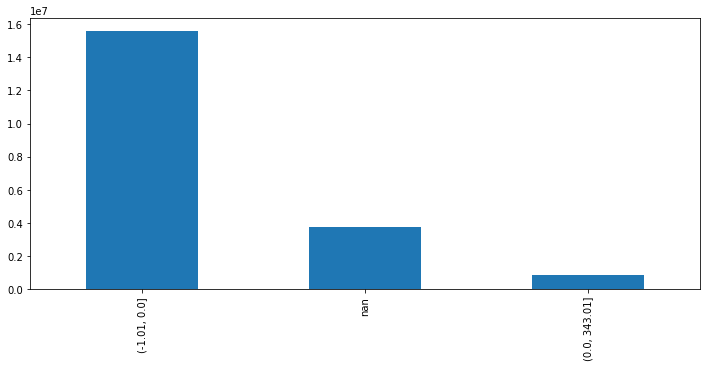

SAME DISTANCE BINNING:


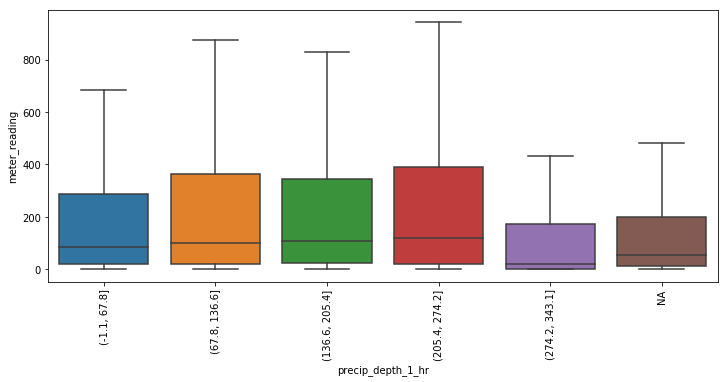

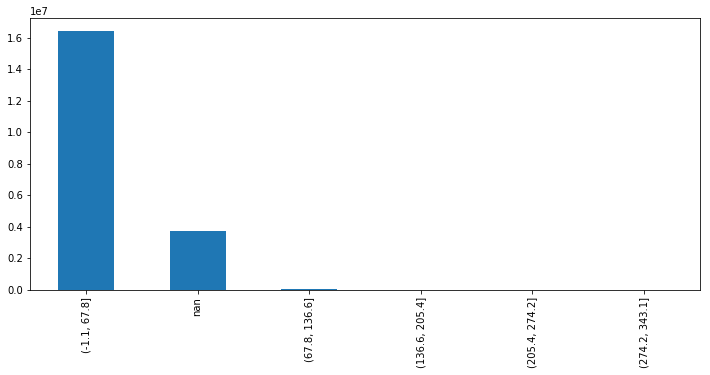

---------------------------------------------------------
---------------------------------------------------------
sea_level_pressure
SAME FREQUENCY BINNING:


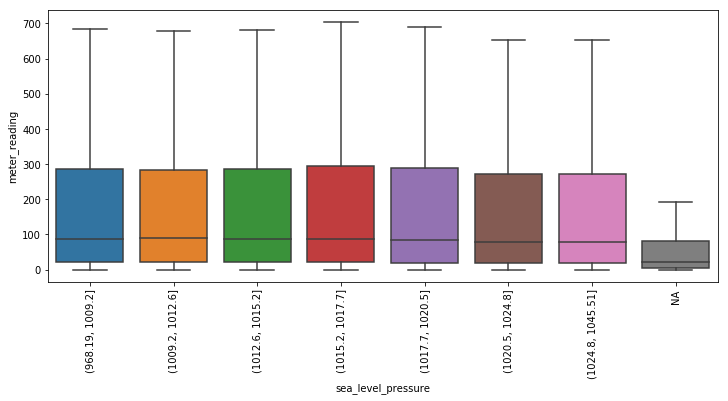

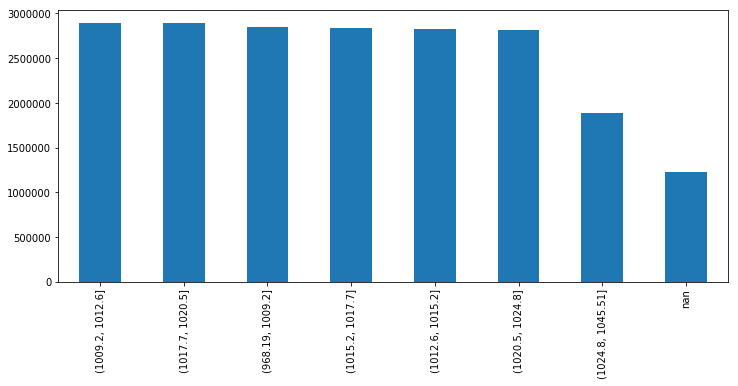

SAME DISTANCE BINNING:


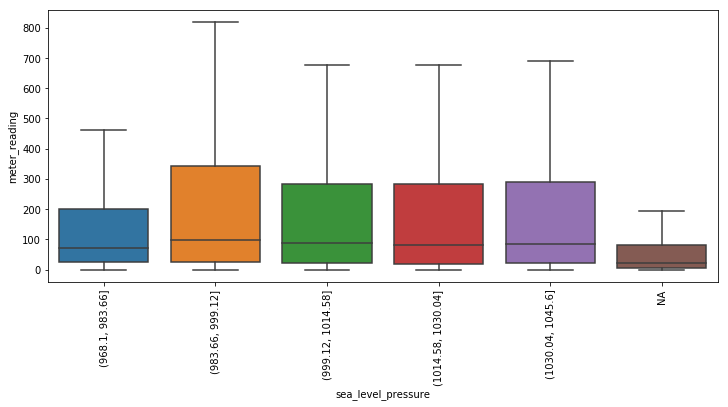

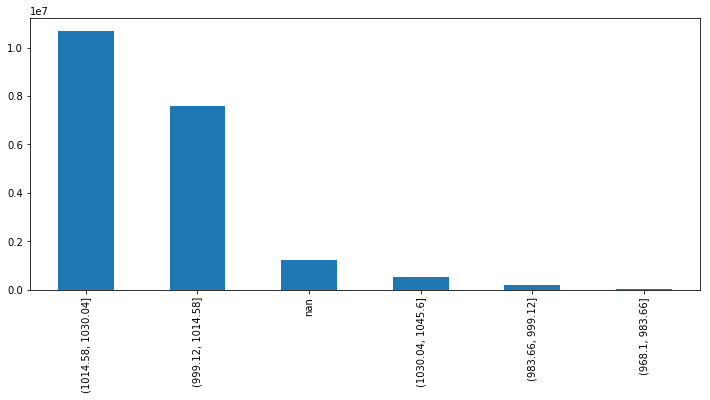

---------------------------------------------------------
---------------------------------------------------------
wind_direction
SAME FREQUENCY BINNING:


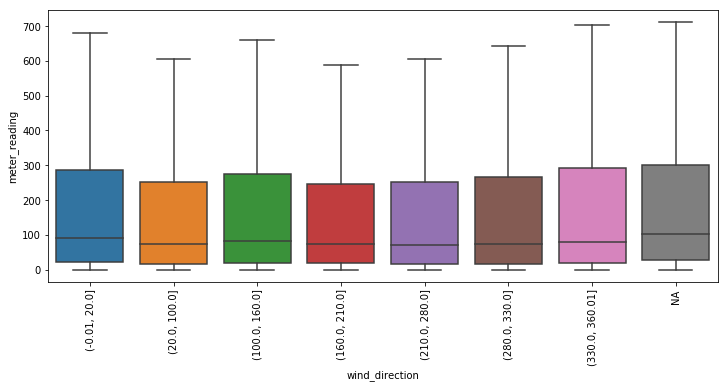

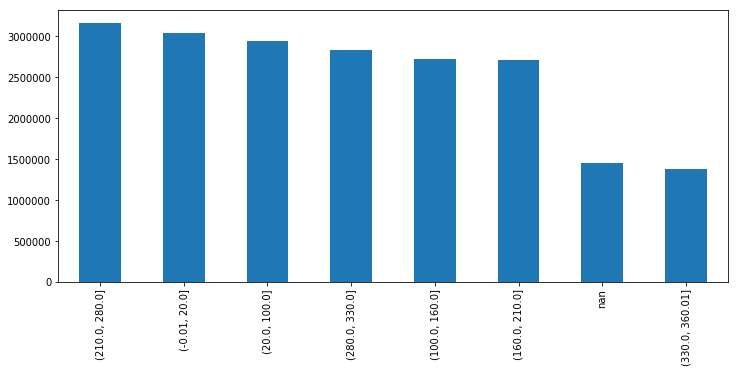

SAME DISTANCE BINNING:


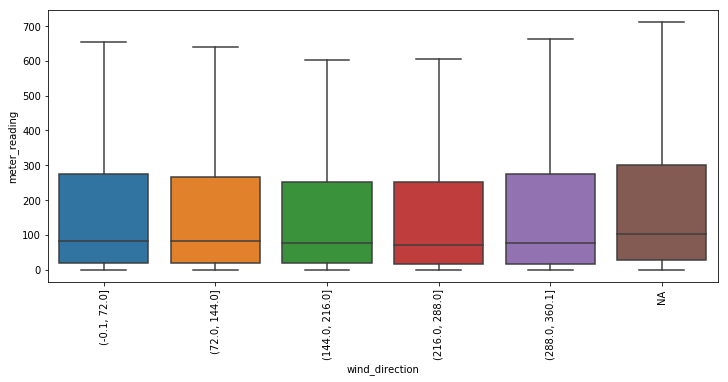

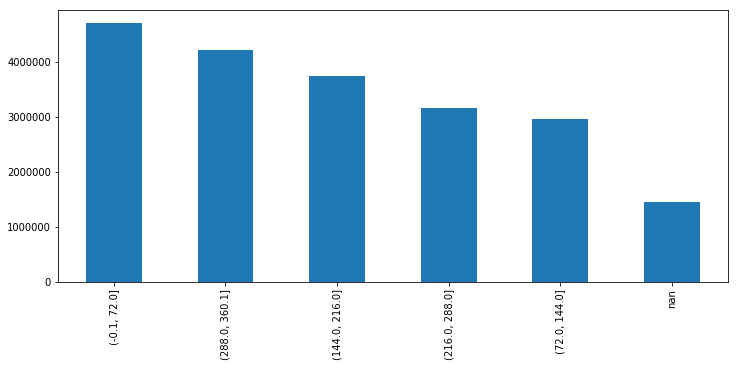

---------------------------------------------------------
---------------------------------------------------------
wind_speed
SAME FREQUENCY BINNING:


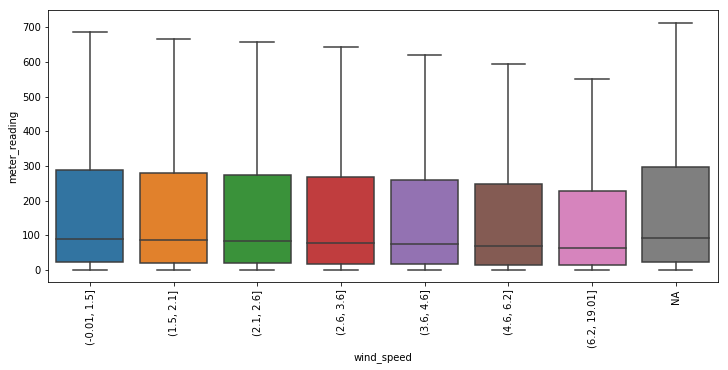

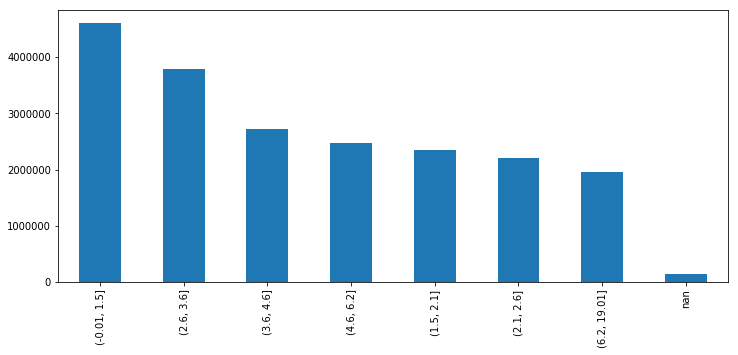

SAME DISTANCE BINNING:


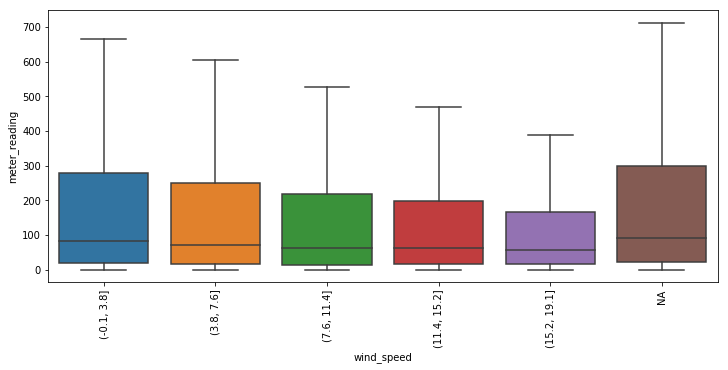

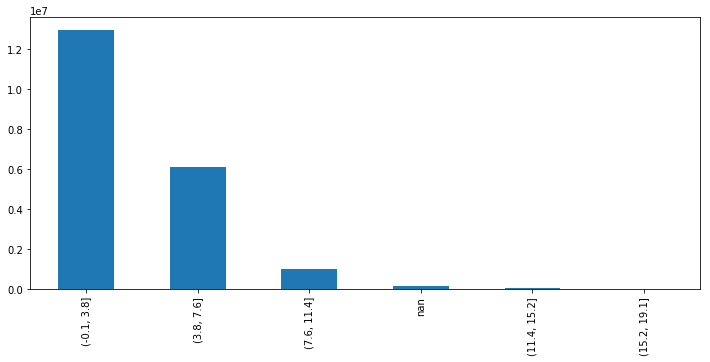

---------------------------------------------------------
---------------------------------------------------------


In [24]:
for i in num_preds:
    print(i)
    
    print('SAME FREQUENCY BINNING:')
    
    borders=[]
    for j in [15,30,45,60,75,90]:
        borders=np.append(borders,np.nanpercentile(train[i],j))
    borders=np.concatenate(([train[i].min()-0.01], borders))
    borders=np.append(borders,train[i].max()+0.01)
    borders=list(dict.fromkeys(borders))
    graph_exploration_continuous(pd.cut(train[i],borders),train['meter_reading'])
    
    plt.figure(figsize=(12,5))
    pd.cut(train[i],borders).value_counts(dropna=False).plot(kind='bar')
    plt.show()
    
    
    print('SAME DISTANCE BINNING:')
    
    borders=[]
    rg=train[i].max()-train[i].min()
    borders=[train[i].min()-0.1,train[i].min()+0.2*rg,train[i].min()+0.4*rg,train[i].min()+0.6*rg,train[i].min()+0.8*rg,train[i].max()+0.1]        
    borders=list(dict.fromkeys(borders))
    graph_exploration_continuous(pd.cut(train[i],borders),train['meter_reading'])
    
    plt.figure(figsize=(12,5))
    pd.cut(train[i],borders).value_counts(dropna=False).plot(kind='bar')
    plt.show()
    
    print('---------------------------------------------------------') 
    print('---------------------------------------------------------')

NameError: name 'ahoj' is not defined